In [2]:
#importing all the required libraries.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Solution to Question 1 part (a)

The location with count of restaurants are:
+------------------------------------------+
|   Location       | Count of Restaurants. |
+------------------------------------------+
|  Delhi-NCR       |     7947              |
|  Rest_of_india   |     705               |
+------------------------------------------+


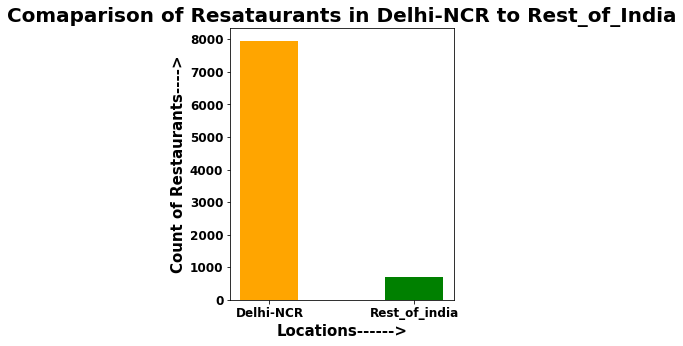

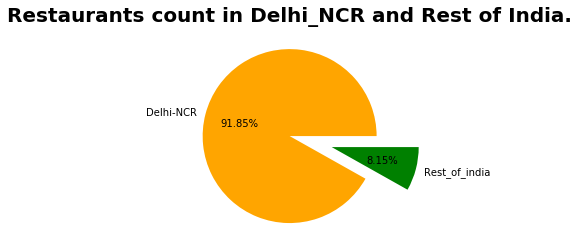

In [32]:
#reading the dataset from the file and creating the datafrmae.
data=pd.read_csv('zomato.csv',encoding='latin-1')

#copying the data to avoid changes in orignal datafrmae.
df=data.copy()

#selecting the restaurants of country==1 (i.e, INDIA).
df1=df[df['Country Code']==1]

#getting the name of cities using value_counts().index and converting in numpy array.
city=np.array(df1['City'].value_counts().index)

#getting the count of number of restaurants in city with value_counts.values and converting in numpy array.
count=np.array(df1['City'].value_counts().values)

#declaring dictionary to store the city and number of restaurants in key value pair.
restaurant_dict={}

#iterating over the city list.
for i in range(len(city)):
    
        #counting the cities New Delhi,Ghaziabad,Gurgaon,Faridabad in Delhi_NCR.
        if city[i] in ['New Delhi','Noida','Ghaziabad','Gurgaon','Faridabad']:
            
            #assigning the key for count of restaurants in Delhi_NCR.
            restaurant_dict['Delhi-NCR']=restaurant_dict.get('Delhi-NCR',0)+count[i]
        else:
            
            #assigning value to the couonts of restaurants in rest of india.
            restaurant_dict['Rest_of_india']=restaurant_dict.get('Rest_of_india',0)+count[i]
            
#getting the name of cities present as key in restaurant_dict.
cities=list(restaurant_dict.keys())

#getting the count of restaurants in Delhi_NCR and Rest_of_India.
counts=list(restaurant_dict.values())

#printing the tabular representation.
print('The location with count of restaurants are:')
print('+------------------------------------------+')
print('|'+' '*3 +'Location'+' '*7+'|'+' '+'Count of Restaurants.'+' '+'|')
print('+------------------------------------------+')
for i in range(2):
    print('|'+' '*2+str(cities[i])+' '*(15-len(cities[i])),'|'+' '*5+str(counts[i])+' '*(17-len(str(counts[i])))+' '+'|')
print('+------------------------------------------+')

#setting the colour array.
color_arr=['orange','Green']

# plotting the graph.
plt.figure(figsize=(4,5))
plt.bar(cities,counts,color=color_arr,width=0.4)
plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.xlabel('Locations------>',fontsize=15,fontweight='bold')
plt.ylabel('Count of Restaurants---->',fontsize=15,fontweight='bold')
plt.title('Comaparison of Resataurants in Delhi-NCR to Rest_of_India',fontweight='bold',fontsize=20)
plt.show()

#plotting the pie chart.
plt.pie(counts,labels=cities,autopct='%.2f%%',colors=color_arr,explode=[0,0.5])
plt.title('Restaurants count in Delhi_NCR and Rest of India.',fontweight='bold',fontsize=20)
plt.show()

# Solution to Question 1 part(b)

In [44]:
#reading the dataset from the file and creating the datafrmae.
data=pd.read_csv('zomato.csv',encoding='latin-1')

#copying the data to avoid changes in orignal datafrmae.
df=data.copy()

#selecting the county==1 (i.e, INDIA).
df2=df[df['Country Code']==1]

#fetching the cuisines list from the database and converting it into array using numpy.array().
cuisine_arr=np.array(df2['Cuisines'])

#fetching the city names from the dataframe and it into array using numpy.array().
city_arr=np.array(df2['City'])

#declaring set to store the unique cuisines in restaurants in delhi.
cuisine_in_delhi=set()

#declaring set to store the unique cuisines in restaurants outside delhi.
cuisine_in_other_state=set()

#iterating over city array.
for i in range(len(city_arr)):
    
    #counting the cities New Delhi,Ghaziabad,Gurgaon,Faridabad in Delhi_NCR.
    if city_arr[i] in ['New Delhi','Noida','Ghaziabad','Gurgaon','Faridabad']:
        
        #since there are multiple cuisines served so splitting them with delim as ','.
        cuisines=cuisine_arr[i].split(',')
        
        #itearting over the list returned by .split() method.
        for i in cuisines:
            
            #avoiding extra space using .strip() and adding them in the cuisine_in_delhi set.
            cuisine_in_delhi.add(i.strip())
    else:
        
        #since there are multiple cuisines served so splitting them with delim as ','.
        cuisines=cuisine_arr[i].split(',')
        
         #itearting over the list returned by .split() method.
        for i in cuisines:
            
             #avoiding extra space using .strip() and adding them in the cuisine_in_other_state set.
            cuisine_in_other_state.add(i.strip())

#To get the cuisines not in delhi we need to perform the set difference between the cusine served outside delhi and cuisine 
#served in delhi using .differnce().
cuisine_not_in_delhi=cuisine_in_other_state.difference(cuisine_in_delhi)

#creating the tabular representation.
print('+------------------------+')
print('|'+'Cuisnes not in Delhi are'+'|')
print('+------------------------+')

#itearting over the returned set.
for i in cuisine_not_in_delhi:
    
    #printing the cuisines.
    print('|'+' '*2+str(i)+' '*(22-(len(str(i))))+'|')
print('+------------------------+')

    

+------------------------+
|Cuisnes not in Delhi are|
+------------------------+
|  German                |
|  BBQ                   |
|  Malwani               |
|  Cajun                 |
+------------------------+


# Verifying using API

In [47]:
#creating the header argument.
h={'user-key':'*********************','Accept':'application/json'}

#creating the parameter argument.
v={'user-key':'*********************','city_id':1}

#fetching the response from api using get()..
response=requests.get("https://developers.zomato.com/api/v2.1/cuisines",
                      headers=h,
                     params=v)

#converting the response to python using .json() so that working would be easy.
data=response.json()

#declaring the cuisines in delhi lsit.
cuisines_in_delhi_1=[]

#iterating over the cuisines list present as value of cuisines which is value of data. 
for i in data['cuisines']:
    
    #appending the cuisnes of delhi.
    cuisines_in_delhi_1.append(i['cuisine']['cuisine_name'])

#getting the unique with set method.
s=set(cuisines_in_delhi_1)

#iterating over the set returned by the difference of cuisines that are served in delhi(fetched using API) and cuisines fetched 
#in delhi using dataframe.

#creating the tabular representation.
print('+------------------------+')
print('|'+'Missing Cuisines are'+' '*4+'|')
print('+------------------------+')
for i in s.difference(cuisine_in_delhi):
    
    #printing the cuisnes that are not served.
    if i in cuisine_not_in_delhi:
        print('|'+' '*2+str(i)+' '*(22-(len(str(i))))+'|')
print('+------------------------+') 
    

+------------------------+
|Missing Cuisines are    |
+------------------------+
|  Malwani               |
|  BBQ                   |
+------------------------+


# Solution to Question 1 part(c)

Top 10 Cuisinses in Delhi_NCR are:
+------------------------------------------+
|   Cuisines       | Count of Restaurants. |
+------------------------------------------+
|  North Indian    |     3597              |
|  Chinese         |     2448              |
|  Fast Food       |     1866              |
|  Mughlai         |     933               |
|  Bakery          |     697               |
|  South Indian    |     569               |
|  Continental     |     547               |
|  Desserts        |     542               |
|  Street Food     |     538               |
|  Italian         |     535               |
+------------------------------------------+
---------------------------------------------------------------------------------------------------
Top 10 Cuisinses in Rest_of_India are:
+------------------------------------------+
|   Cuisines       | Count of Restaurants. |
+------------------------------------------+
|  North Indian    |     349               |
|  Chinese      

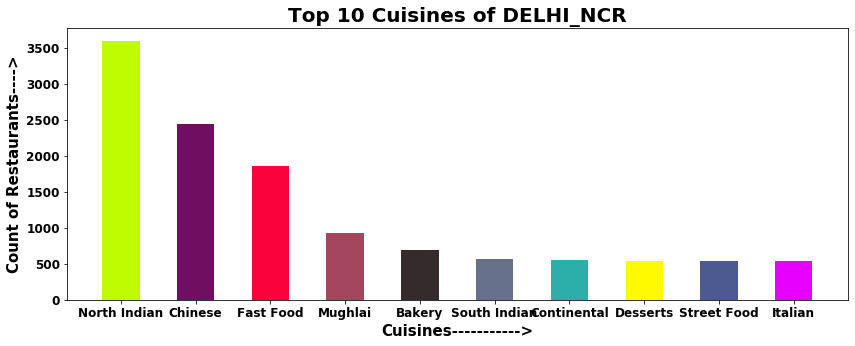

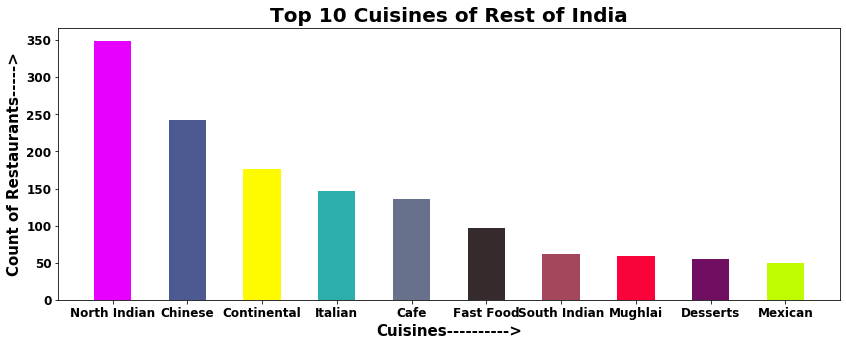

In [50]:
#reading the dataset from the file and creating the datafrmae.
data=pd.read_csv('zomato.csv',encoding='latin-1')

#copying the data to avoid changes in orignal datafrmae.
df=data.copy()

#selecting the county==1 (i.e, INDIA).
df3=df[df["Country Code"]==1]

#creating the city array using np.array().
city_arr=np.array(df3['City'])

#creating the cuisines array using np.array().
cuisine_arr=np.array(df3['Cuisines'])

#declaring the cuisine_delhi to store the cuisines and number of restaurnats serving them as key value pair in delhi.
cuisine_delhi={}

#declaring the cuisine_outside_delhi to store the cuisines and number of restaurnats serving them as key value pair outside delhi.
cuisine_outside_delhi={}

#itearting over the city array.
for i in range(len(city_arr)):
    
    #counting the cities New Delhi,Ghaziabad,Gurgaon,Faridabad in Delhi_NCR.
    if city_arr[i] in ['New Delhi','Noida','Ghaziabad','Gurgaon','Faridabad']:
        
        #since there are multiple cuisines served so splitting them with delim as ','.
        for c in cuisine_arr[i].split(','):
            
            #avoiding extra space using .strip() and adding the count of each cuisines.
            cuisine_delhi[c.strip()]=cuisine_delhi.get(c.strip(),0)+1
    else:
        
        #since there are multiple cuisines served so splitting them with delim as ','.
        for c in cuisine_arr[i].split(','):
            
            #avoiding extra space using .strip() and adding the count of each cuisines.
            cuisine_outside_delhi[c.strip()]=cuisine_outside_delhi.get(c.strip(),0)+1
            
#sorting the dictinary in descending order based upon values for cuisines in delhi.          
sorted_cuisine_delhi={k :v for k,v in sorted(cuisine_delhi.items(), key=lambda item:item[1], reverse=True)}

#sorting the dictinary in descending order based upon values for cuisines outside delhi. 
sorted_cuisine_outside_delhi={k :v for k,v in sorted(cuisine_outside_delhi.items(), key=lambda item:item[1], reverse=True)}

#getting the names of top 10 cusines of delhi.
cuisines_name_in_delhi=list(sorted_cuisine_delhi.keys())[:10]

#getting the counts of restaurants serving cuisines in delhi.
counts_of_cuisines_in_delhi=list(sorted_cuisine_delhi.values())[:10]

#Creating the table.
print('Top 10 Cuisinses in Delhi_NCR are:')
print('+------------------------------------------+')
print('|'+' '*3 +'Cuisines'+' '*7+'|'+' '+'Count of Restaurants.'+' '+'|')
print('+------------------------------------------+')
for i in range(len(cuisines_name_in_delhi)):
    print('|'+' '*2+str(cuisines_name_in_delhi[i])+' '*(15-len(cuisines_name_in_delhi[i])),'|'+' '*5+str(counts_of_cuisines_in_delhi[i])+' '*(17-len(str(counts_of_cuisines_in_delhi[i])))+' '+'|')
print('+------------------------------------------+')

#getting the names of top 10 cusines outside delhi.
cuisines_name_not_in_delhi=list(sorted_cuisine_outside_delhi.keys())[:10]

#getting the counts of restaurants serving cuisines outside delhi.
counts_of_cuisines_not_in_delhi=list(sorted_cuisine_outside_delhi.values())[:10]

#creating the table.
print('---------------------------------------------------------------------------------------------------')
print('Top 10 Cuisinses in Rest_of_India are:')
print('+------------------------------------------+')
print('|'+' '*3 +'Cuisines'+' '*7+'|'+' '+'Count of Restaurants.'+' '+'|')
print('+------------------------------------------+')
for i in range(len(cuisines_name_not_in_delhi)):
    print('|'+' '*2+str(cuisines_name_not_in_delhi[i])+' '*(15-len(cuisines_name_not_in_delhi[i])),'|'+' '*5+str(counts_of_cuisines_not_in_delhi[i])+' '*(17-len(str(counts_of_cuisines_not_in_delhi[i])))+' '+'|')
print('+------------------------------------------+')




#creating the colour array.
color_arr=['#BFFC01','#700E61','#FA033B','#A5475C','#352B2D','#68718B','#2CAFAB','#FEFA00','#4C5A91','#E700FE']

#plotting the bar graph for cuisines in delhi.
plt.figure(figsize=(14,5))
plt.bar(cuisines_name_in_delhi,counts_of_cuisines_in_delhi,color=color_arr,width=0.5)
plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.title('Top 10 Cuisines of DELHI_NCR',fontweight='bold',fontsize=20)
plt.xlabel('Cuisines----------->',fontsize=15,fontweight='bold')
plt.ylabel("Count of Restaurants---->",fontweight='bold',fontsize=15)
plt.show()

#plotting the bar graph for cuisines outside delhi.
plt.figure(figsize=(14,5))
plt.bar(cuisines_name_not_in_delhi,counts_of_cuisines_not_in_delhi,color=color_arr[::-1],width=0.5)
plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.title('Top 10 Cuisines of Rest of India',fontweight='bold',fontsize=20)
plt.xlabel('Cuisines---------->',fontweight='bold',fontsize=15)
plt.ylabel("Count of Restaurants----->",fontweight='bold',fontsize=15)
plt.show()

# 1.)The first bar graph presents the top 10 cuisines that are served by         restaurants of Delhi_NCR.

# 2.)The second bar graph presents the top 10 cuisines that are served by restaurants in india other than excluding Delhi_NCR region.

# 3.)From the graph it is clear that North Indian cuisines and chinese are the cuisines that are served by maximum restaurants of region including and excluding Delhi_NCR (North Indian prefered more over chinese).

# 4.) There are some cuisines that are common in both the graphs (Mughlai, Continental, Fast Food, South Indian, Desserts, Italian) but they differ in their counts of restaurants serving them.
# 5.) There are some cuisines that are new in both graphs(Bakery, Mexican).


# Solution to Question 1 part(d)

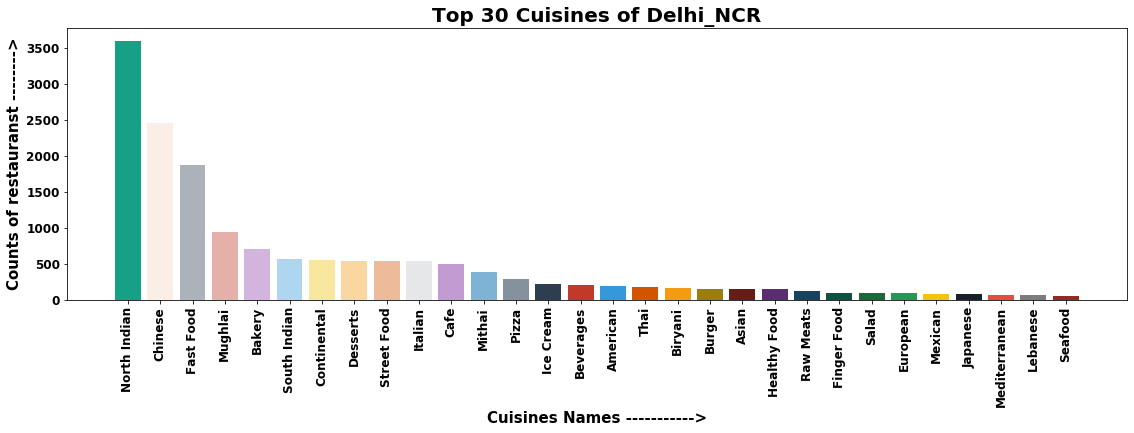

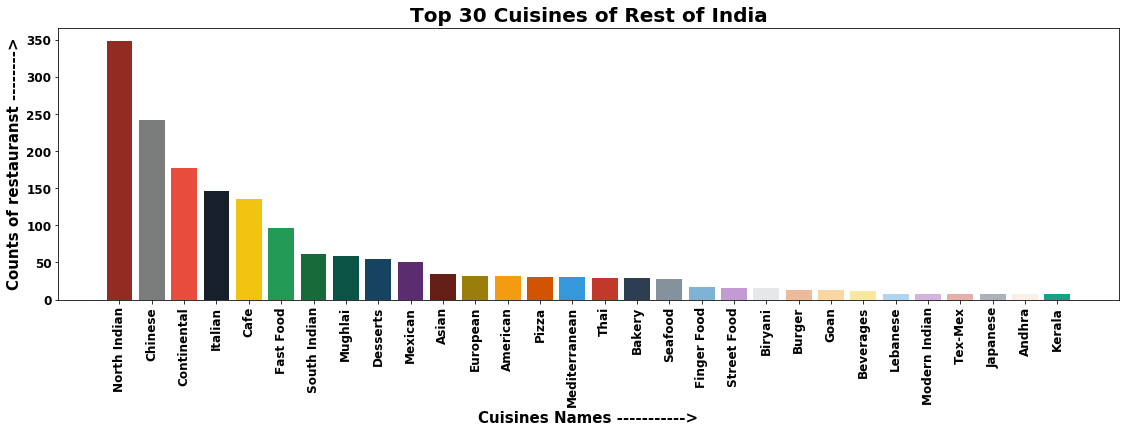

In [20]:
#reading the dataset from the file and creating the datafrmae.
data=pd.read_csv('zomato.csv',encoding='latin-1')

#copying the data to avoid changes in orignal datafrmae.
df=data.copy()

#selecting the county==1 (i.e, INDIA).
df4=df[df['Country Code']==1]

#fetching the city names from the dataframe and it into array using numpy.array().
city_arr=np.array(df4['City'])

#fetching the cuisines list from the database and converting it into array using numpy.array().
cuisines_arr=np.array(df4['Cuisines'])

#declaring the dictionary to get the cuisines and count of cuisines as key value pair in delhi.
cuisines_counts_of_delhi={}

#declaring the dictionary to get the cuisines and count of cuisines as key value pair outside delhi.
cuisines_counts_outside_delhi={}

#iterating over city array.
for i in range(len(city_arr)):
    
    #counting the cities New Delhi,Ghaziabad,Gurgaon,Faridabad in Delhi_NCR.
    if city_arr[i] in ['New Delhi','Noida','Ghaziabad','Gurgaon','Faridabad']:
        
        #since there are multiple cuisines served so splitting them with delim as ','.
        #itearting over the list returned by .split() method.
        for cus in cuisine_arr[i].split(','):
            
            #avoiding extra space using .strip() and adding in their counts.
            cuisines_counts_of_delhi[cus.strip()]=cuisines_counts_of_delhi.get(cus.strip(),0)+1
    else:
        
        #since there are multiple cuisines served so splitting them with delim as ','.
        #itearting over the list returned by .split() method.
        for cus in cuisine_arr[i].split(','):
            
            #avoiding extra space using .strip() and adding in their counts.
            cuisines_counts_outside_delhi[cus.strip()]=cuisines_counts_outside_delhi.get(cus.strip(),0)+1

#sorting the dictionary in descending order of their values for cuisines present in delhi.
sorted_cuisine_dsc_delhi={k :v for k,v in sorted(cuisines_counts_of_delhi.items(),key=lambda item:item[1],reverse=True)}

#sorting the dictionary in descending order of their values for cuisines present outside delhi.
sorted_cuisine_dsc_outside={k:v for k,v in sorted(cuisines_counts_outside_delhi.items(),key=lambda item:item[1],reverse=True)}

#getting the names of top 30 cusines outside delhi.
cuisine_name_out_delhi=list(sorted_cuisine_dsc_outside.keys())[:30]

#getting the counts of restaurants serving cuisines outside delhi.
count_out_delhi=list(sorted_cuisine_dsc_outside.values())[:30]

#getting the names of top 30 cusines of delhi.
cuisine_name_in_delhi=list(sorted_cuisine_dsc_delhi.keys())[:30]

#getting the counts of restaurants serving cuisines in delhi.
count_in_delhi=list(sorted_cuisine_dsc_delhi.values())[:30]

#creating the colour array.
color_arr=['#16A085','#FBEEE6','#ABB2B9','#E6B0AA','#D2B4DE','#AED6F1','#F9E79F','#FAD7A0','#EDBB99','#E5E7E9',
          '#C39BD3','#7FB3D5','#85929E','#2C3E50','#C0392B','#3498DB','#D35400','#F39C12','#9A7D0A','#641E16',
          '#5B2C6F','#154360','#0B5345','#186A3B','#229954','#F1C40F','#17202A','#E74C3C','#7B7D7D','#922B21']

#plotting the graph.
plt.figure(figsize=(19,5))
plt.bar(cuisine_name_in_delhi,count_in_delhi,width=0.8,color=color_arr)
plt.title('Top 30 Cuisines of Delhi_NCR',fontsize=20,fontweight='bold')
plt.xticks(fontweight='bold',rotation=90,fontsize=12)
plt.yticks(fontweight='bold',fontsize=12)
plt.xlabel('Cuisines Names ----------->',fontsize=15,fontweight='bold')
plt.ylabel('Counts of restauranst -------->',fontsize=15,fontweight='bold')
plt.show()

#plotting the graph.
plt.figure(figsize=(19,5))
plt.bar(cuisine_name_out_delhi,count_out_delhi,width=0.8,color=color_arr[::-1])
plt.title('Top 30 Cuisines of Rest of India',fontsize=20,fontweight='bold')
plt.xticks(rotation=90,fontsize=12,fontweight='bold')
plt.yticks(fontweight='bold',fontsize=12)
plt.xlabel('Cuisines Names ----------->',fontsize=15,fontweight='bold')
plt.ylabel('Counts of restauranst -------->',fontsize=15,fontweight='bold')
plt.show()

# Analysis:
Here I have plotted the graphs of top 30 widely served cuisines that are served in Delhi_NCR and Rest of India, from graph it is clear that North Indian cuisine is the cuisine that is served by maximum number of restaurants of India (In Delhi_NCR=3597, Rest of India=349). After that chinese cuisine is widely served( In Delhi_NCR=2448, Rest of India=242).After these two we have fast food as widely served(In Delhi_NCR=1866, Rest of India=97). After this we have Mughlai cusinie (In Delhi_NCR=933, Rest of India=59), and there are many more cusinies as show in the graph.